# Algoritmo de Deutsch-Josza

In [12]:
import qiskit as q

In [26]:
import matplotlib
print(matplotlib.__version__)
# debe ser 3.5.0 o superior

3.5.0


In [27]:
from array_to_latex import to_ltx
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
def printarray(array,preface=""):
    printmd("$"+preface+to_ltx(array, frmt = '{:6.2f}', arraytype = 'pmatrix',print_out= False)+"$")

In [28]:
N = 3
algo = q.QuantumCircuit(N,N-1)

algo.x(N-1)

algo.h(range(N))

#algo.append(bal_oracle(N),range(N))
algo.append(con_oracle(N),range(N))

algo.h(range(N-1))



$$ U \left| b_1 b_2 \dots b_{n-1}\right> \left|b_n\right> =  \left| b_1 b_2 \dots b_{n-1}\right> \left|b_n \oplus f(b_1 \dots b_{n-1})\right>$$

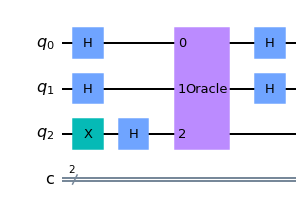

In [29]:
algo.draw("mpl")

## Simulación

$\begin{pmatrix}
  -0.71 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.71 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

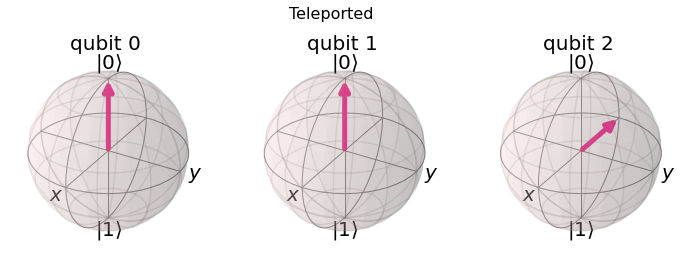

In [30]:
statesim = q.Aer.get_backend('statevector_simulator')
out = q.execute(algo,statesim).result().get_statevector()
printarray(out.data)
q.visualization.plot_bloch_multivector(out,title="Estado final (3 qubits)")

$\begin{pmatrix}
    1.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j &    0.00 +   0.00j
\end{pmatrix}$

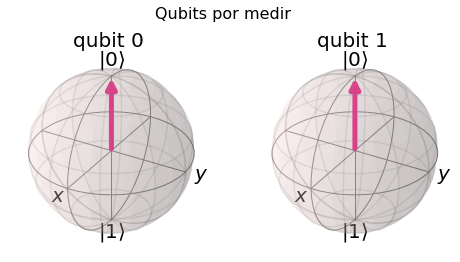

In [32]:
ptrace = q.quantum_info.partial_trace(out,[2])
final_state = ptrace.to_statevector()
printarray(final_state.data)
q.visualization.plot_bloch_multivector(final_state,title="Qubits por medir")

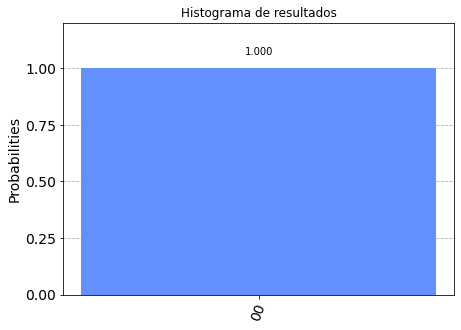

In [33]:
algo.measure(range(N-1),range(N-1))
simulator = q.Aer.get_backend('aer_simulator')
trans = q.transpile(algo,simulator)
result = simulator.run(trans).result()
counts = result.get_counts(trans)
q.visualization.plot_histogram(counts, title='Histograma de resultados')

## Construcción del Oráculo

In [34]:
def bal_oracle(n):
    or_circuit = q.QuantumCircuit(n)
    from random import random
    inverted = []
    for i in range(n-1):
        if random()>0.5:
            inverted.append(i)
            or_circuit.x(i)
        or_circuit.cnot(i,n-1)
    if len(inverted)>0:
        or_circuit.x(inverted)
    return or_circuit.to_gate(label="Oracle")

def con_oracle(n):
    or_circuit = q.QuantumCircuit(n)
    or_circuit.x(n-1)
    return or_circuit.to_gate(label="Oracle")

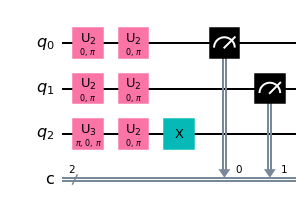

In [35]:
algo.decompose().draw("mpl")

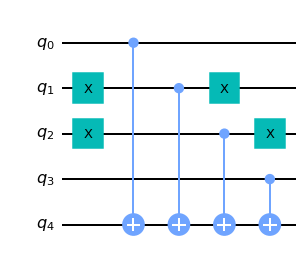

In [36]:
oracle = q.QuantumCircuit(5)
oracle.append(bal_oracle(5),range(5))
oracle.decompose().draw("mpl")